In [1]:
import pandas as pd

data = pd.read_csv('training.csv')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib.patches as patches

def addPoint(ax, sample, name):
    x = sample[name + '_x']
    y = sample[name + '_y']
    ax.add_patch(patches.Circle((x, y),1))

def show(sampleId):
    sample = data.iloc[sampleId]
    imageData = sample['Image']
    imageData = [int(x) for x in imageData.split(' ')]
    width, height = 96, 96

    image = np.array(imageData)
    image = np.reshape(image, (width, height))

    fig,ax = plt.subplots()
    addPoint(ax, sample, 'left_eye_inner_corner')
    addPoint(ax, sample, 'left_eye_outer_corner')
    addPoint(ax, sample, 'left_eye_center')

    addPoint(ax, sample, 'right_eye_inner_corner')
    addPoint(ax, sample, 'right_eye_outer_corner')
    addPoint(ax, sample, 'right_eye_center')

    addPoint(ax, sample, 'right_eyebrow_inner_end')
    addPoint(ax, sample, 'right_eyebrow_outer_end')

    addPoint(ax, sample, 'left_eyebrow_inner_end')
    addPoint(ax, sample, 'left_eyebrow_outer_end')

    addPoint(ax, sample, 'nose_tip')

    addPoint(ax, sample, 'mouth_left_corner')
    addPoint(ax, sample, 'mouth_right_corner')

    addPoint(ax, sample, 'mouth_center_top_lip')
    addPoint(ax, sample, 'mouth_center_bottom_lip')
    
    ax.imshow(image, cmap = 'gray')

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


<function __main__.show>

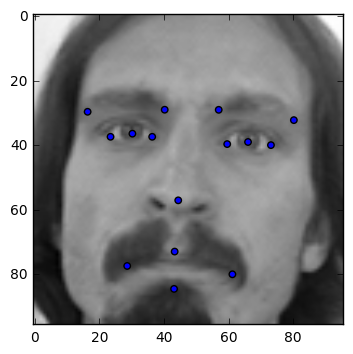

In [4]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

interact(show, sampleId=widgets.IntSlider(min=0,max=len(data)-1,step=1,value=0))

In [7]:
mean = data.mean()

In [6]:
test = pd.read_csv('test.csv')

In [13]:
class TestResults:
    def __init__(self):
        self.lockupTable = pd.read_csv('IdLookupTable.csv')
        self.table = [0.0] * len(self.lockupTable)
    def setValue(self, imageId, name, value):
        rowId = self.lockupTable[(self.lockupTable['ImageId'] == imageId) & (self.lockupTable['FeatureName'] == name)]
        if len(rowId) != 0:
            self.table[rowId.iloc[0]['RowId'] - 1] = value
            return True
        else:
            return False
    def write(self, filename='test_results.csv'):
        fd = open(filename, 'w')
        fd.write('RowId,Location\n')
        for i in range(len(self.table)):
            fd.write("%d,%f\n"%(i+1,self.table[i]))
        fd.close()
    def columns(self):
        return ['left_eye_center', 'right_eye_center', 'left_eye_inner_corner', 'left_eye_outer_corner', 'right_eye_inner_corner', 'right_eye_outer_corner', 'left_eyebrow_inner_end', 'left_eyebrow_outer_end', 'right_eyebrow_inner_end', 'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner', 'mouth_right_corner', 'mouth_center_top_lip', 'mouth_center_bottom_lip']

In [14]:
r = TestResults()
for imageId in range(len(test)):
    for col in r.columns():
        r.setValue(imageId + 1, col + '_x', mean[col + '_x'])
        r.setValue(imageId + 1, col + '_y', mean[col + '_y'])
r.write()

In [5]:
test.head()